<a href="https://colab.research.google.com/github/chayaphon/DADS6003/blob/main/Classification/Logistic_Regression/stock_prediction.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Uncomment to install required library
# !pip install numpy
# !pip install pandas
# !pip install yfinance
# !pip install TA-Lib
# !pip install matplotlib
# !pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
### Import Data
st = yf.Ticker('ptt.bk')
interval = '1h'
start = '2023-01-01'
end = '2023-12-31'
df = st.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 10:00:00+07:00,33.50,33.50,32.75,32.75,16197181,0.0,0.0
2023-01-03 11:00:00+07:00,33.00,33.25,32.75,33.00,8403871,0.0,0.0
2023-01-03 12:00:00+07:00,33.00,33.00,32.75,33.00,537021,0.0,0.0
2023-01-03 14:00:00+07:00,33.00,33.00,32.75,32.75,1552485,0.0,0.0
2023-01-03 15:00:00+07:00,33.00,33.00,32.75,32.75,1757109,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,35.50,36.00,35.50,35.75,28387917,0.0,0.0
2023-12-28 12:00:00+07:00,35.75,36.00,35.75,35.75,484119,0.0,0.0
2023-12-28 14:00:00+07:00,35.75,36.00,35.75,35.75,1401463,0.0,0.0


# Part 1 : Standard Features

In [4]:
df1 = df.copy().dropna()

In [5]:
### Define Target/Dependent Variable
X = df1.iloc[:,:4]
y = np.where(df1['Close'].shift(-1) > df1['Close'],1,-1)

### Split dataset for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fit to model
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

### Coefficients
coefficients = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)), columns=['Feature', 'Coefficient'])
print(coefficients)

  Feature            Coefficient
0    Open  [0.10698457090105282]
1    High   [3.0244248350359633]
2     Low    [2.412441017648107]
3   Close   [-5.581754512524884]


In [6]:
prediction = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1] 
result = X_test.copy()
result['Actual'] = y_test
result['Predict'] = prediction
result['probabilities'] = probabilities
result[result['probabilities']>= 0.5]

,Open,High,Low,Close,Actual,Predict,probabilities
Datetime,,,,,,,
2023-03-24 10:00:00+07:00,31.50,31.50,31.00,31.00,1,1,0.601702
2023-10-06 10:00:00+07:00,32.25,32.25,31.75,31.75,1,1,0.594870
2023-08-31 15:00:00+07:00,35.00,35.25,34.75,34.75,1,1,0.560620
2023-08-07 10:00:00+07:00,35.00,35.00,34.50,34.50,-1,1,0.569521
2023-03-17 10:00:00+07:00,29.75,30.25,29.75,29.75,1,1,0.600237
2023-09-07 11:00:00+07:00,35.50,35.50,35.00,35.00,1,1,0.564869
2023-10-06 15:00:00+07:00,32.00,32.00,31.50,31.50,-1,1,0.597152
2023-05-25 12:00:00+07:00,31.50,31.75,31.25,31.25,1,1,0.592990
2023-09-14 10:00:00+07:00,34.75,35.00,34.50,34.50,1,1,0.562952


In [7]:
# Model Accuracy
correct = len(result[result['Actual']==result['Predict']])
accuracy = correct/len(result)
print(f'Model accuracy : {accuracy*100:.2f}%')

Model accuracy : 73.06%


In [8]:
### Confusion Matrix
print(metrics.confusion_matrix(y_test, prediction))

[[304  10]
 [108  16]]


In [9]:
### Precision, Recall, and F1-Score
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

          -1       0.74      0.97      0.84       314
           1       0.62      0.13      0.21       124

    accuracy                           0.73       438
   macro avg       0.68      0.55      0.53       438
weighted avg       0.70      0.73      0.66       438



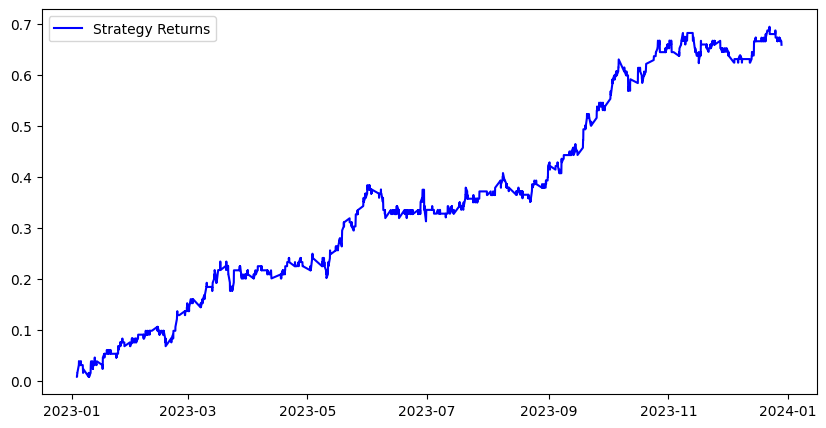

In [10]:
# Strategy returns
df1['Predicted_Signal'] = model.predict(X)
df1['Stock_returns'] = np.log(df1['Close']/df1['Close'].shift(1))
df1['Strategy_returns'] = df1['Stock_returns']* df1['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns1 = np.cumsum(df1['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns1, color='b', label = 'Strategy Returns')
plt.legend()
plt.show()

# Part 2 : Additional Feature

In [11]:
df2 = df.copy().dropna()

In [12]:
### Add feature

# Technical Indicators
import talib as ta

df2 = df2.iloc[:,:4]
df2['S_10'] = df2['Close'].rolling(window=10).mean()
df2['Corr'] = df2['Close'].rolling(window=10).corr(df2['S_10'])
df2['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df2['Open-Close'] = df2['Open'] - df2['Close'].shift(1)
df2['Open-Open'] = df2['Open'] - df2['Open'].shift(1)
df2 = df2.dropna()
df2

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-06 10:00:00+07:00,32.25,32.50,32.25,32.25,32.225,0.088764,39.615530,0.00,0.00
2023-01-06 11:00:00+07:00,32.50,32.75,32.25,32.50,32.250,-0.053361,53.195895,0.25,0.25
2023-01-06 12:00:00+07:00,32.50,32.75,32.50,32.50,32.275,-0.018559,53.195895,0.00,0.00
2023-01-06 14:00:00+07:00,32.75,32.75,32.50,32.75,32.325,0.357534,63.367102,0.25,0.25
2023-01-06 15:00:00+07:00,32.75,32.75,32.50,32.50,32.350,0.576215,51.042384,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,35.50,36.00,35.50,35.75,35.625,0.394665,59.488657,-0.25,0.00
2023-12-28 12:00:00+07:00,35.75,36.00,35.75,35.75,35.650,0.329276,59.488657,0.00,0.25
2023-12-28 14:00:00+07:00,35.75,36.00,35.75,35.75,35.650,0.757282,59.488657,0.00,0.00


In [13]:
### Define Target/Dependent Variable
X = df2.iloc[:,:9]
y = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)

### Split dataset for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fit to model
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

### Coefficients
coefficients = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)), columns=['Feature', 'Coefficient'])
print(coefficients)

      Feature             Coefficient
0        Open    [0.1307228515264337]
1        High    [3.4029218466806186]
2         Low     [2.144386408952332]
3       Close    [-3.953125765467299]
4        S_10   [-1.6951914516157418]
5        Corr  [-0.12851693975427694]
6         RSI  [-0.04764669178148913]
7  Open-Close  [-0.19459757971502223]
8   Open-Open    [0.4110387249364355]


In [14]:
prediction = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1] 
result = X_test.copy()
result['Actual'] = y_test
result['Predict'] = prediction
result['probabilities'] = probabilities
result[result['probabilities']>= 0.5]

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,Actual,Predict,probabilities
Datetime,,,,,,,,,,,,
2023-03-10 15:00:00+07:00,30.75,30.75,30.50,30.50,31.000,0.944641,21.102224,0.00,0.25,1,1,0.514120
2023-02-28 12:00:00+07:00,32.25,32.25,32.00,32.00,32.325,0.895343,27.243265,0.00,0.00,-1,1,0.502175
2023-10-04 15:00:00+07:00,32.00,32.25,32.00,32.00,32.275,0.678077,29.481135,-0.25,0.00,1,1,0.507681
2023-02-23 10:00:00+07:00,32.75,32.75,32.25,32.25,32.875,0.837073,27.106523,0.00,-0.25,1,1,0.574987
2023-09-11 15:00:00+07:00,34.75,34.75,34.50,34.50,34.800,0.940051,27.033452,0.25,0.00,1,1,0.520231
2023-12-15 11:00:00+07:00,35.75,36.00,35.50,35.50,35.700,0.761905,43.630480,0.00,0.00,-1,1,0.601491
2023-06-27 15:00:00+07:00,31.75,31.75,31.25,31.25,31.575,0.500870,39.690268,0.25,0.00,1,1,0.569256
2023-01-11 10:00:00+07:00,33.25,33.50,33.00,33.00,33.000,0.430379,55.190256,0.25,0.00,-1,1,0.529866
2023-09-25 10:00:00+07:00,33.50,33.75,33.25,33.25,33.525,0.356095,41.208903,-0.25,-0.25,1,1,0.582029


In [15]:
# Model Accuracy
correct = len(result[result['Actual']==result['Predict']])
accuracy = correct/len(result)
print(f'Model accuracy : {accuracy*100:.2f}%')

Model accuracy : 75.93%


In [16]:
### Confusion Matrix
print(metrics.confusion_matrix(y_test, prediction))

[[312   8]
 [ 96  16]]


In [17]:
### Precision, Recall, and F1-Score
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

          -1       0.76      0.97      0.86       320
           1       0.67      0.14      0.24       112

    accuracy                           0.76       432
   macro avg       0.72      0.56      0.55       432
weighted avg       0.74      0.76      0.70       432



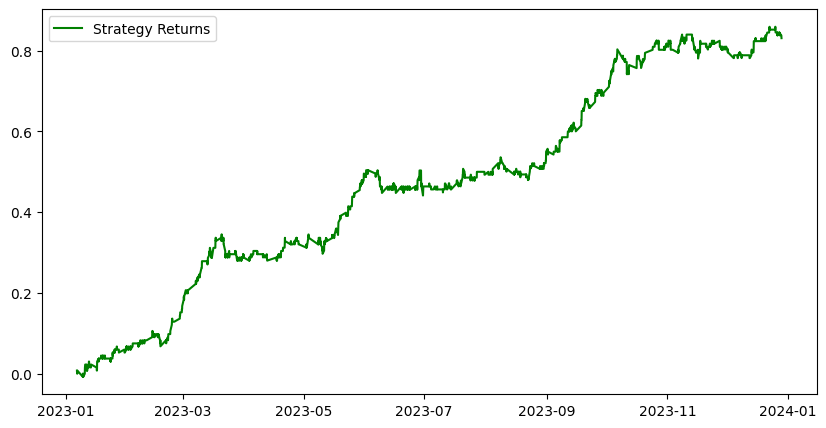

In [18]:
# Strategy returns
df2['Predicted_Signal'] = model.predict(X)
df2['Stock_returns'] = np.log(df2['Close']/df2['Close'].shift(1))
df2['Strategy_returns'] = df2['Stock_returns']* df2['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns2 = np.cumsum(df2['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns2, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

### Plot two graps of Srategy Returns (before and after adding new feature)

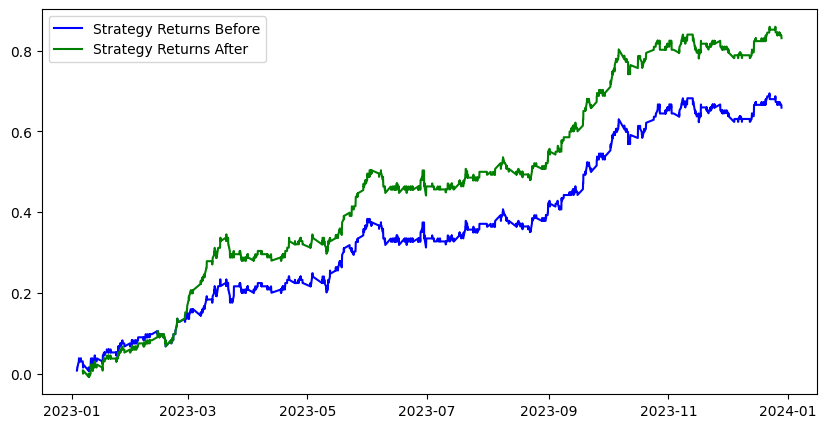

In [19]:
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns1, color='b', label = 'Strategy Returns Before')
plt.plot(Cumulative_Strategy_returns2, color='g', label = 'Strategy Returns After')
plt.legend()
plt.show()